In [1]:
%reset -f
%config Completer.use_jedi = True
# %matplotlib widget

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import os,glob,sys,importlib#,scipy,coolbox,pybedtools,
from scipy.stats import linregress
from scipy.ndimage import gaussian_filter
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from scipy import stats
import biosppy
# from sklearn import metrics
os.chdir('/home/dcmorgan')
os.getcwd()

'/home/dcmorgan'

# load data

In [ ]:
primary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Primary Data')
diet=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Diet Data')
blood_stool=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='blood and stool biomarkers')
secondary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Secondary Data')
MRI=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='MRI scores')

In [ ]:
unibact=pd.read_csv('data/328_krakenuniq_raw.csv',index_col=0)
unibact['spec']=(unibact.index).str.split(';').str[0:6].tolist()
# jeff=pd.DataFrame(unibact['spec'].tolist(),columns=['tmp','tmp','tmp','tmp','tmp','species'])
# jeff=jeff.fillna(method='ffill',axis=1)


In [ ]:
unibact.columns=unibact.columns.str.split('-').str[0].tolist()

In [ ]:
PP=primary[primary.index.isin(unibact.columns)]



In [ ]:
sub_uni=unibact[primary.index[primary.index.isin(unibact.columns)]]
sub_uni.columns=PP['Hypertension Category by 24h BP w/o considering antihypertensive med']
# sub_uni

In [ ]:
aa=np.corrcoef((sub_uni[2]).astype(float))
# aa=aa[aa!=1]
a=plt.hist(aa.flatten(),bins=100,log=True,alpha=.65)

bb=np.corrcoef((sub_uni[1]).astype(float))
# bb=bb[bb!=1]
b=plt.hist(bb.flatten(),bins=100,log=True,alpha=.5)

cc=np.corrcoef((sub_uni[0]).astype(float))
# cc=cc[cc!=1]
c=plt.hist(cc.flatten(),bins=100,log=True,alpha=.35)

In [ ]:
a=nx.from_numpy_array(aa[1:100,1:100])
b=nx.from_numpy_array(bb[1:100,1:100])
c=nx.from_numpy_array(cc[1:100,1:100])

# cc.shape

In [ ]:
nx.draw(a)
nx.draw(b)
nx.draw(c)

In [ ]:
# nx.from_numpy_array(aa[(aa>.5)&(aa[1:100,1:100])])
nx.average_clustering(a)

In [ ]:
aa=np.array(stats.spearmanr(sub_uni[2],axis=1))
# aa=aa[aa!=1]
a=plt.hist(aa.flatten(),bins=100,log=True,alpha=.65)

bb=np.array(stats.spearmanr(sub_uni[1],axis=1))
# bb=bb[bb!=1]
b=plt.hist(bb.flatten(),bins=100,log=True,alpha=.5)

cc=np.array(stats.spearmanr(sub_uni[0],axis=1))
# cc=cc[cc!=1]
c=plt.hist(cc.flatten(),bins=100,log=True,alpha=.35)

In [ ]:
ww=plt.hist(bb-cc,bins=100,alpha=.65,log=True)
ww=plt.hist(bb-aa,bins=100,alpha=.5,log=True)
ww=plt.hist(aa-cc,bins=100,alpha=.35,log=True)

In [ ]:
from scipy import stats
cc=np.array(stats.spearmanr(unibact.values[0:1000,0:1000])).flatten()
cc=cc[cc!=1]
# np.array(cc)
cc=plt.hist(cc,bins=100,log=True)

In [ ]:
oric=pd.read_csv('data/doric10/tubic_bacteria.csv') #remove 'note' and 'nt*' from file

In [ ]:
oric['oric_start']=oric['Location of replication origin'].str.split('.').str[0].str.split(',').str[0].str.split(';').str[0].tolist()
oric['oric_end']=oric['Location of replication origin'].str.split('.').str[2].str.split(',').str[0].str.split(';').str[0].tolist()
oric['gene_start']=oric['Location of replication genes'].str.split('.').str[0].str.split(',').str[0].str.split(';').str[0].tolist()
oric['gene_end']=oric['Location of replication genes'].str.split('.').str[2].str.split(',').str[0].str.split(';').str[0].tolist()

In [ ]:
oric['OriC AT content']=np.round(oric['OriC AT content']*100).astype(int)
oric['orgA']=oric['Organism'].str.split(' ').str[0].tolist()
oric['orgB']=oric['Organism'].str.split(' ').str[1].tolist()
oric['Organism']=oric['orgA']+'_'+oric['orgB']


In [ ]:
oric[['oric_start','oric_end','gene_start','gene_end']]=oric[['oric_start','oric_end','gene_start','gene_end']].replace('-','1')
oric=oric.fillna('1')

In [ ]:
oric[['gene_start']]=oric[['gene_start']].astype(int)
oric[['gene_end']]=oric[['gene_end']].astype(int)
oric[['oric_start']]=oric[['oric_start']].astype(int)
oric[['oric_end']]=oric[['oric_end']].astype(int)

In [ ]:
# oric['end']=np.amax(oric[['oric_start','oric_end','gene_start','gene_end']],1)
# oric['start']=np.amin(oric[['oric_start','oric_end','gene_start','gene_end']],1)
jj=ori[ori['oric_start']>ori['oric_end']]#
jj['oric_end']=jj['oric_start']+jj['oric_end']
ff=ori[ori['oric_start']<ori['oric_end']]
ORIC=ff.append(jj)

In [ ]:
ORIC['refseq']=ORIC['Refseq'].str.split('.').str[0].tolist()
ORIC['len']=ORIC['oric_end']-ORIC['oric_start']

In [ ]:
ORIC[['refseq','oric_start','oric_end','OriC AT content','Organism','len']].to_csv('data/doric10/OriC_db.bed',sep='\t',header=True,index=False)

In [ ]:
sns.set_style("white")
tmp=plt.hist(ORIC['len'],bins=100,log=True)

In [ ]:
traces= np.sort(glob.glob('data/meta*/*bedgraph'))
jac=traces[1000]
e='NC_'+jac.split('/')[2].split('_')[1]

In [ ]:
e='NC_'+os.path.basename(jac).split('_')[1]
e

In [ ]:

table=[]
# color=pd.DataFrame()
color0=pd.DataFrame(columns=['species','subj','ratio','slope'])

traces= np.sort(glob.glob('data/meta*/*bedgraph'))
ori=pd.read_csv('data/doric10/OriC_db.bed',sep='\t')
# cc=ori[ori['Organism']==('Escherichia_coli')]
cc=ori
dd=cc[cc['refseq'].str.contains('NC_')]['refseq']

i=0
for d,c in tqdm(enumerate(traces)):
    # indices = [i for i, s in enumerate(traces) if c in s]
#     # if not indices.zeros:
    # if indices !=[]:
    # tmp0=ori[ori.refseq=='NC_'+os.path.basename(traces[0]).split('_')[1]]
    jac=traces[d]
    e='NC_'+os.path.basename(jac).split('_')[1]
    f=jac.split('/')[2].split('_')[2].split('-')[0]
    tmp=ori[ori['refseq'].str.contains(e)]
    if tmp.zeros==False:
        for uu in range(len(tmp)):
        
            # for dd,cc in tqdm(enumerate(d)):

            # ax = axes[SLICES[i]]
            zzz=pd.read_csv(jac,sep='\t',names=['tmp','start','end','relAb'])


            zzz['len']=zzz['end']-zzz['start']
            jeff3=np.repeat((zzz.relAb), repeats = zzz['len'])
            jeff3=jeff3.reset_index()
            # df0=jeff3.groupby(jeff3.index // 1000).sum()
            # try:
        
            ppp=tmp.iloc[uu]['oric_start'].item()
            # ppp=tmp['oric_start'].item()
            jj=jeff3.loc[ppp].values[1]
            cc=jeff3.loc[ppp-1000:ppp+1000+tmp.iloc[uu]['len']]
            
            # jj=df0.relAb[int(np.round(ppp/1000,-2))]
            # table.append()
            df1=jeff3.sort_values(by='relAb')
            df2=df1[(df1['relAb']>np.median(df1[df1['relAb']!=0])/5)&(df1['relAb']<np.median(df1[df1['relAb']!=0])*5)]
            df2=df2.reset_index()
            color0['species']=e
            color0['subj']=f
            color0['ratio']=np.mean(cc.relAb)/np.mean(jeff3.relAb),
            color0['slope']=linregress((df2.index), (df2.relAb))[0]
            # table.append(jeff22)
            if i==0:
                color0.to_csv('data/relAb_ratio5.txt',sep='\t')
                i=i+1
            else:
                color0.to_csv('data/relAb_ratio5.txt',sep='\t',mode='a',header=False,index=False)
                
            # print(jj/np.mean(df0.relAb))
            # print(jj)
            # except:
            #     pass

In [ ]:
data=pd.read_csv('data/relAb_ratio5.txt',sep='\t')#,names=['species','subj','ratio','slope'])
# d
plt.figure(figsize=(10,5))
# plt.figsize=(40, 40)
data2=data[data['ratio']>0]
ax=sns.scatterplot(data=data2, x="ratio", y="slope", hue="species",style='subj')
plt.legend([],[], frameon=False)
j=str(np.round(scipy.corrcoef(data2.ratio,data2.slope)[0][1],5))
h=str(np.round(scipy.stats.spearmanr(data2.ratio,data2.slope)[0],5))
plt.title('pearson: '+j+'; spearman: '+h)
# ax.legend(loc='best',ncol=10, title="Title")

In [ ]:
jacc=4
'data/relAb_ratio'+str(jacc)+'.txt'


In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(data=data2, x="ratio", hue="species")#, multiple="dodge", shrink=.8)


In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(data=data2, x="slope", hue="species")

# Plectoneme

In [ ]:
Swave='CGCTATTCTTCGGTTAACGAAGTCTGTAATTGATTTGTTAAGTTTTTCTTTTGAATATACGCATTAATTTTAGATTGAATTTGCTGAAGCTCTTCTTGATCAGCTTCTCGAATGGTTTGCTCCTTTTGTTCGCTCGTTAACGATTGTGAAGAAGCAGGAGACTGATTAGGGGCTGTCTCCACTTCATTTGTTTTTTTCGTACTTTTAGCTGCAGGGGTATTTGAAGGCTGAACCGCTTCTTCAGATTCCTGCAGAGATTGAAATTCCATCACGCCCGTTCCTCCAACGAACGCTTCATTAAATGCGCGAGAAAGGTTCTTAAATTTCTGCGCATCCACTGAGCTCATTGCAAACAATACAATGAATAAAGCAAGTAAAAGTGTAAGCAAATCTGAGTAAGGAAGCAGCCAGCTTTCGTCAACATGGTCCTCTTCATGCTTTCGTTTTCTGCGTCTACTCATTTATGCCCACTTCACTTTCTTGAAGAAGCTTTTTACGTTCCGCTGTTGGCAAATAAGAAGCCAGCTTTTGCTCAATTACTTTTGGTGTTTCTCCTTCTAAAAGTGAAAGCACTCCTTCGATCATCATATACTTTACCTTTACTTCATGTTTCGATTTACGCTTTAGTTTATTTGCAAACGGATGCCATAGTACATACCCAGTAAAAATACCAAGAAGCGTAGCAACAAACGCCGCGCTGATCGCATGTCCTAGCGTATCTGTATCTTCCATGTTCCCAAGCGCAGCAATTAACCCTATAACAGCTCCAAGTACACCCAGAGTTGGAGCATATGTACCTGCTAAAGCGAAAATACTTGCACCCGTTTGATGTCTTTCTTCCATAGCATCAATTTCTTCAGACAACACGTCTCGTATATAATCCGCACTTTGACCATCAATAGCTAAATTCAAACCATTTTTTAAGAAAGGGTCATCTACATCAATAATTTGGGCTTCAAGTGATAGTAACCCTTCTTTTCGAACAACTTGTCCCCATTCAGAAAACGCGT'

In [ ]:
igordat=pd.read_csv('run/oric/Plectoneme/test_data/igor_out.txt',sep='\t')
dnapath=pd.read_csv('run/oric/Plectoneme/test_data/dnapath.txt',sep='\t',names=['A','B','C','tmp'])
bp_cov=pd.read_csv('run/oric/Plectoneme/test_data/bp_cov.txt',sep='\t',names=['A','B'])
tanvector=pd.read_csv('run/oric/Plectoneme/test_data/tanvector.txt',sep='\t',names=['A','B','C'])
localcov=pd.read_csv('run/oric/Plectoneme/test_data/localcov.txt',sep='\t',names=['A','B'])
normvector=pd.read_csv('run/oric/Plectoneme/test_data/normvector.txt',sep='\t',names=['A','B','C'])
curvevector=pd.read_csv('run/oric/Plectoneme/test_data/CurveVector.txt',sep='\t',names=['A','B','C'])

In [ ]:
sys.path.insert(1, './run/oric/Plectoneme/')
import PlectonemeCode
importlib.reload(sys.modules['PlectonemeCode'])
from PlectonemeCode import PlectonemeCode
# Gaussian filter FWHM = 1600


Sequence_angle_exp_smth,Sequence_angle_exp= PlectonemeCode(Swave)
#,wave['Direction (ϕB, degrees)'],wave['Wedge (θ, degrees)'],
#                wave['Twist (degrees)'],wave['Tilt-Tilt covariance'],wave['Roll-Roll covariance'])


In [ ]:
jeff=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,0,0], kernel='boxcar', size=40)
# jeff
plt.figure(figsize=(20,5))
plt.bar(np.arange(len(BasepairCovariance)),BasepairCovariance[:,0,0])
plt.plot(np.arange(len(jeff[0])),jeff[0])

In [ ]:
# plt.scatter(BasepairCovariance[:,0],BasepairCovariance[:,1])
# plt.scatter(bp_cov.A,bp_cov.B,alpha=.5)
plt.scatter(LocalCovariance[:,0],LocalCovariance[:,1])
plt.scatter(localcov.A,localcov.B,alpha=.5)

In [ ]:
plt.scatter(igordat.Sequence_angle_exp,Sequence_angle_exp)
[np.corrcoef(igordat.Sequence_angle_exp,Sequence_angle_exp),
stats.spearmanr(igordat.Sequence_angle_exp,Sequence_angle_exp)]

In [ ]:
plt.scatter(normvector[0:1010].A,NormVector[:,0])
plt.scatter(normvector[0:1010].B,NormVector[:,1])
plt.scatter(normvector[0:1010].C,NormVector[:,2])
plt.scatter(CurvePhase,igordat.CurvePhase)

plt.scatter(tanvector[0:1010].A,TanVector[:,0])
plt.scatter(tanvector[0:1010].B,TanVector[:,1])
plt.scatter(tanvector[0:1010].C,TanVector[:,2])

plt.scatter(curvevector[0:1010].A,CurveVector[:,0])
plt.scatter(curvevector[0:1010].B,CurveVector[:,1])
plt.scatter(curvevector[0:1010].C,CurveVector[:,2])

cc=np.concatenate((DNApath,DNApathMajorGroove),axis=0)
plt.scatter(dnapath.A,cc[1:,0])
plt.scatter(dnapath.B,cc[1:,1])
plt.scatter(dnapath.C,cc[1:,2])

plt.scatter(igordat.CurveMag,CurveMag)
plt.scatter(curvevector.B,CurveVector[:,1])
plt.scatter(curvevector.C,CurveVector[:,2])

plt.scatter(np.log(Sequence_phase),np.log(igordat.Sequence_phase))

In [ ]:
#SG
jeff=np.arange(len(Sequence_angle_exp))
# np.log(Sequence_angle_exp_smth)
# np.log(Sequence_angle_exp)

cc=Sequence_angle_exp#np.nan_to_num((Sequence_angle_exp), copy=False, nan=0.0, posinf=0.0, neginf=0.0)
dd=Sequence_angle_exp_smth/np.mean(Sequence_angle_exp_smth)#np.nan_to_num((Sequence_angle_exp_smth), copy=False, nan=0.0, posinf=0.0, neginf=0.0)

# plt.figure(figsize=(20,5))
plt.bar(jeff,cc)
# plt.bar(np.arange(len(Sequence_angle_exp)),Sequence_angle_exp)
# plt.plot(jeff,dd)


In [ ]:
plt.bar(igordat.index,igordat.Sequence_angle_exp)
# plt.plot(igordat.index,igordat.Sequence_angle_exp_smth)


In [ ]:
sys.path.insert(1, './run/oric/Plectoneme/')
# import savitzky_golay
importlib.reload(sys.modules['load_measures'])
# from savitzky_golay import savitzky_golay
# from smooth import smooth
import load_measures
from load_measures import load_measures
# Swave='CGCTATTCTTCGGTTAACGAAGTCTGTAATTGATTTGTTAAGTTTTTCTTTTGAATATACGCATTAATTTTAGATTGAATTTGCTGAAGCTCTTCTTGATCAGCTTCTCGAATGGTTTGCTCCTTTTGTTCGCTCGTTAACGATTGTGAAGAAGCAGGAGACTGATTAGGGGCTGTCTCCACTTCATTTGTTTTTTTCGTACTTTTAGCTGCAGGGGTATTTGAAGGCTGAACCGCTTCTTCAGATTCCTGCAGAGATTGAAATTCCATCACGCCCGTTCCTCCAACGAACGCTTCATTAAATGCGCGAGAAAGGTTCTTAAATTTCTGCGCATCCACTGAGCTCATTGCAAACAATACAATGAATAAAGCAAGTAAAAGTGTAAGCAAATCTGAGTAAGGAAGCAGCCAGCTTTCGTCAACATGGTCCTCTTCATGCTTTCGTTTTCTGCGTCTACTCATTTATGCCCACTTCACTTTCTTGAAGAAGCTTTTTACGTTCCGCTGTTGGCAAATAAGAAGCCAGCTTTTGCTCAATTACTTTTGGTGTTTCTCCTTCTAAAAGTGAAAGCACTCCTTCGATCATCATATACTTTACCTTTACTTCATGTTTCGATTTACGCTTTAGTTTATTTGCAAACGGATGCCATAGTACATACCCAGTAAAAATACCAAGAAGCGTAGCAACAAACGCCGCGCTGATCGCATGTCCTAGCGTATCTGTATCTTCCATGTTCCCAAGCGCAGCAATTAACCCTATAACAGCTCCAAGTACACCCAGAGTTGGAGCATATGTACCTGCTAAAGCGAAAATACTTGCACCCGTTTGATGTCTTTCTTCCATAGCATCAATTTCTTCAGACAACACGTCTCGTATATAATCCGCACTTTGACCATCAATAGCTAAATTCAAACCATTTTTTAAGAAAGGGTCATCTACATCAATAATTTGGGCTTCAAGTGATAGTAACCCTTCTTTTCGAACAACTTGTCCCCATTCAGAAAACGCGT'
Twave, Wwave, Dwave, CwaveRR, CwaveTT=load_measures()

# Run Plectoneme on Gordon's High and None

In [81]:
sys.path.insert(1, './run/oric/Plectoneme/')
import PlectonemeCode
importlib.reload(sys.modules['PlectonemeCode'])
from PlectonemeCode import PlectonemeCode
# from run_gordon_plect import run_gordon_plect
# [len(high),len(zero),max(high['len']),max(zero['len'])]

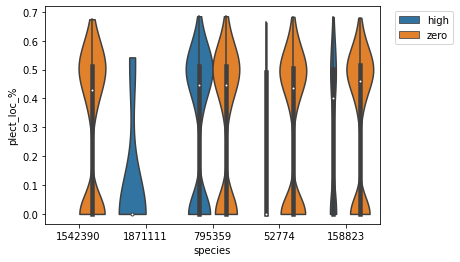

In [211]:
traces=glob.glob("data/Plectoneme/*_plect_*.txt")
AA=pd.DataFrame()
BB=pd.DataFrame()
from statannot import add_stat_annotation
for trace in traces:
    typ=os.path.basename(trace).split('_')[0]
    spec=os.path.basename(trace).split('_')[2].split('.')[0]
    if typ=='high':
        A=pd.read_csv(trace, delimiter="\t",names=['mean','median','>=1','area','max_ind','len','plect_len','max'])
        # A=A[A['area']!=0]
        A['type']=typ
        A['species']=spec
        # A['filt']=str(os.path.basename(trace).split('_')[4].split('.')[0])
        AA=AA.append(A)
    else:
        B=pd.read_csv(trace, delimiter="\t",names=['mean','median','>=1','area','max_ind','len','plect_len','max'])
        # B=B[B['area']!=0]
        B['type']=typ
        B['species']=spec
        # B['filt']=str(os.path.basename(trace).split('_')[4].split('.')[0])
        BB=BB.append(B)
    
C=AA.append(BB)
C=C[C['area']!=0]
# C=C[C['len']>=1000]

# C=C[C['max_ind']!=0]
C['density']=C['area']/C['len']
C['plect_%']=C['>=1']/C['len']
C['plect_loc_%']=C['max_ind']/C['len']
C['TSS_plect']=(C['max_ind']<=60)*(C['max_ind']>=10)+0
C['TSS']=((C['max_ind']<=10)+0)*C['max']
# C['TSS']

C.dropna(inplace=True)
C=C.reset_index()
ax=sns.violinplot(data=C,y='plect_loc_%',x='species',hue='type',cut=0,scale='count')#,kind="violin",cut=0,scale="count", inner="quartile")

# add_stat_annotation(ax, data=C, x='species', y='TSS>1',hue='type',
#                     box_pairs=[(("821", "high"), ("821", "none")),
#                                  (("853", "high"), ("853", "none")),
#                                  (("2479767", "high"), ("2479767", "none"))
#                                 ],
#                     test='t-test_ind', text_format='star', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

# add in Measurement of bacterial replication rates in microbial communities

In [ ]:
traces= glob.glob('data/meta_unfilt/*bedgraph')
ori=pd.read_csv('data/doric10/OriC_db.bed',sep='\t')

for jac in traces:
    zzz=pd.read_csv(jac,sep='\t',names=['tmp','start','end','relAb'])
    tmp=ori[ori['Refseq'].str.contains('NC_'+jac.split('/')[2].split('_')[1])]
    
    plt.figure(figsize=(20, 5))
    try:
        print('running: '+str(tmp['Organism'].item())+" in "+str(os.path.basename(jac).split('_')[2].split('.')[0]))
        ss=np.int(np.round(tmp['start'].item(),-1))
        tt=np.int(np.round(tmp['end'].item(),-1))
        plt.bar(data=zzz[(zzz['start']>ss-250000)&(zzz['end']<tt+250000)],x='start',height='relAb',label='align',color='blue')#][zzz['start']=='1665929']
        plt.bar(data=tmp,x='start',height='OriC AT content',label='OriC start',color='orange')
        plt.bar(data=tmp,x='end',height='OriC AT content',label='OriC end',color='orange')

        plt.axes([.2, .6, .6, .2])
        plt.bar(data=zzz[(zzz['start']>ss-100) &(zzz['end']<tt+100)],x='start',height='relAb',label='align',color='blue')#][zzz['start']=='1665929']
        plt.bar(data=tmp,x='start',height='OriC AT content',label='OriC start',color='orange')
        plt.bar(data=tmp,x='end',height='OriC AT content',label='OriC end',color='orange')

        plt.xlabel("OriC ranges from "+str(tmp['start'].item())+" to "+str(tmp['end'].item())+" for "
            +str(tmp['Organism'].item())+" in "+str(os.path.basename(jac).split('_')[2].split('.')[0])+"max= "+
                   np.max(zzz['relAb'])+" between "+str(np.int(zzz[zzz['relAb']==np.max(zzz['relAb'])][['start']].values))+" and "+str(np.int(zzz[zzz['relAb']==np.max(zzz['relAb'])][['end']].values))+"; median= "+np.median(zzz['relAb']),fontsize=14)
        plt.savefig('img/oric/'+str(os.path.basename(jac).split('.')[0])+'.png',dpi=300,bbox_inches = "tight")

    except TypeError:
        pass
    except ValueError:
        pass

In [ ]:
ori[ori['Organism']=='Staphylococcus_aureus']

In [ ]:
tmp=ori[ori['Refseq'].str.contains('NC_'+jac.split('/')[2].split('_')[1])]

In [ ]:
bact_stat=pd.read_csv('flagstatA.txt',sep='\t',names=['q0','q1','type'])
bact_stat['sample']=bact_stat[bact_stat['q0'].str.contains(".bam")]['q0'].repeat(21).values
# bact_stat.loc[1:1000]
bact_stat['bact']=bact_stat['sample'].str.split('_').str[1].tolist()
bact_stat['pat']=bact_stat['sample'].str.split('_').str[2].tolist()
del bact_stat['sample'], bact_stat['q1']
bact_stat.dropna(how='any',inplace=True)
bact_stat=bact_stat[~bact_stat.type.str.contains("%")]

In [ ]:
bact_stat['q0']=bact_stat.q0.astype('int')
bact_stat['q1']=np.log10(bact_stat['q0'])

In [ ]:
sns.set_theme(style="whitegrid")
# iris = sns.load_dataset("iris")
plt.figure(figsize=(12, 24))
# "Melt" the dataset to "long-form" or "tidy" representation
# iris = pd.melt(bact_stat, ["bact",'patient'], var_name="type")
# del bact_stat['sample'], bact_stat['q1']
# bact_stat.dropna(how='any',inplace=True)
# bact_stat=bact_stat[~bact_stat.type.str.contains("%")]
# Initialize the figure
# f, ax = plt.subplots()
# sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
ax=sns.stripplot(x="q1", y="type", hue="bact",
              data=bact_stat, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
ax=sns.pointplot(x="q1", y="type", hue="bact",
              data=bact_stat, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),ncol=2)
plt.savefig("flagstat.png",dpi=300,bbox_inches = "tight")

# Improve the legend
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, title="bact",
#           handletextpad=0, columnspacing=1,
#           loc='lower center', ncol=5, frameon=False)#,bbox_to_anchor=(1.05, 1),borderaxespad=0.)


In [ ]:
jeff=pd.pivot_table(bact_stat,columns='type',index=['bact','pat'],values='q0')

In [ ]:
jeff=jeff.reset_index()

In [ ]:
jeff =jeff.loc[:, (jeff != 0).any(axis=0)]
# del jeff['secondary']  
del jeff['primary mapped'], jeff['with itself and mate mapped']

In [ ]:
jeff

In [ ]:
sns.pairplot(jeff, hue="bact")
plt.savefig("flagstat_corr.png",dpi=300,bbox_inches = "tight")


In [ ]:
jeff0=pd.melt(jeff,id_vars=['bact','pat'])

In [ ]:
jeff0['log10_value']=np.log10(jeff0.value)

In [ ]:
sns.set_theme(style="whitegrid")
# iris = sns.load_dataset("iris")
plt.figure(figsize=(12, 24))
# "Melt" the dataset to "long-form" or "tidy" representation
# iris = pd.melt(bact_stat, ["bact",'patient'], var_name="type")
# del bact_stat['sample'], bact_stat['q1']
# bact_stat.dropna(how='any',inplace=True)
# bact_stat=bact_stat[~bact_stat.type.str.contains("%")]
# Initialize the figure
# f, ax = plt.subplots()
# sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
ax=sns.stripplot(x="log10_value", y="type", hue="bact",
              data=jeff0, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
ax=sns.pointplot(x="log10_value", y="type", hue="bact",
              data=jeff0, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),ncol=2)
plt.savefig("flagstat_red.png",dpi=300,bbox_inches = "tight")

# Improve the legend
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, title="bact",
#           handletextpad=0, columnspacing=1,
#           loc='lower center', ncol=5, frameon=False)#,bbox_to_anchor=(1.05, 1),borderaxespad=0.)


# ERIK

In [ ]:
def logic(index):
    if index % 2 != 0:
       return True
    return False

def unlogic(index):
    if index % 2 == 0:
       return True
    return False


USV=pd.read_csv('data/MYC_NetCom_R2_USV.csv',sep='\t',skiprows=lambda x: logic(x))
USV['NET']=pd.read_csv('data/MYC_NetCom_R2_USV.csv',sep='\t',skiprows=lambda x: unlogic(x))['Unnamed: 1']
# USV['meth']='USV'
USV=USV[[' R2','NET']]
# USV.rename(columns={' R2': "USV_R2"},inplace=True)
USV['V']='V'
USV['pinv']='pinvA'

UStV=pd.read_csv('data/MYC_NetCom_R2_UStV.csv',sep='\t',skiprows=lambda x: logic(x))
UStV['NET']=pd.read_csv('data/MYC_NetCom_R2_UStV.csv',sep='\t',skiprows=lambda x: unlogic(x))['Unnamed: 1']
UStV=UStV[[' R2','NET']]
# UStV.rename(columns={' R2': "UStV_R2"},inplace=True)
UStV['V']="V'"
UStV['pinv']='pinvA'

USV_invAP=pd.read_csv('data/MYC_NetCom_R2_USV_invAP.csv',sep='\t',skiprows=lambda x: logic(x))
USV_invAP['NET']=pd.read_csv('data/MYC_NetCom_R2_USV_invAP.csv',sep='\t',skiprows=lambda x: unlogic(x))['Unnamed: 1']
USV_invAP=USV_invAP[[' R2','NET']]
# USV_invAP.rename(columns={' R2': "USV_invAP_R2"},inplace=True)
USV_invAP['V']='V'
USV_invAP['pinv']='pinvAP'

UStV_invAP=pd.read_csv('data/MYC_NetCom_R2_UStV_invAP.csv',sep='\t',skiprows=lambda x: logic(x))
UStV_invAP['NET']=pd.read_csv('data/MYC_NetCom_R2_UStV_invAP.csv',sep='\t',skiprows=lambda x: unlogic(x))['Unnamed: 1']
UStV_invAP=UStV_invAP[[' R2','NET']]
# UStV_invAP.rename(columns={' R2': "UStV_invAP_R2"},inplace=True)
UStV_invAP['V']="V'"
UStV_invAP['pinv']='pinvAP'

C=USV.append([UStV,USV_invAP,UStV_invAP],ignore_index=True)
df2 = C.pivot_table(index=['NET'], columns=['V','pinv'])
df2.columns = [' '.join(col).strip() for col in df2.columns.values]

In [ ]:
df2=df2.sort_values('R2 V pinvA')
dfA=df2.reset_index()
# df2
dfA[dfA['NET'].str.contains('1253')]

In [ ]:
df2=df2.sort_values("R2 V' pinvA")
dfB=df2.reset_index()
# df2
dfB[dfB['NET'].str.contains('1253')]

In [ ]:
df2=df2.sort_values("R2 V pinvAP")
dfC=df2.reset_index()
# df2
dfC[dfC['NET'].str.contains('1253')]

In [ ]:
df2=df2.sort_values("R2 V' pinvAP")
dfD=df2.reset_index()
# df2
dfD[dfD['NET'].str.contains('1253')]

In [ ]:
df2=df2.sort_values('R2 V pinvA')
dfA=df2.reset_index()
# df2
dfA[dfA['NET'].str.contains('1145')]

In [ ]:
df2=df2.sort_values("R2 V' pinvA")
dfB=df2.reset_index()
# df2
dfB[dfB['NET'].str.contains('1145')]

In [ ]:
df2=df2.sort_values("R2 V pinvAP")
dfC=df2.reset_index()
# df2
dfC[dfC['NET'].str.contains('1145')]

In [ ]:
df2=df2.sort_values("R2 V' pinvAP")
dfD=df2.reset_index()
# df2
dfD[dfD['NET'].str.contains('1145')]

In [ ]:
from scipy.stats import spearmanr

def corrfunc(x, y, **kws):
    (r, p) = spearmanr(x, y,nan_policy='omit')
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)
graph=sns.pairplot(df2)
graph.map(corrfunc)

plt.savefig("data/MYC_R2.png",dpi=300,bbox_inches = "tight")
plt.show()